In [99]:
import pandas as pd
import seaborn as sb

In [101]:
def jog_data(acc,gyr):    
    ACC = pd.read_csv(acc)
    GYR = pd.read_csv(gyr)
    ACC = ACC.rename(columns={"x":"accx","y":"accy","z":"accz"})
    GYR = GYR.rename(columns={"x":"gyrx","y":"gyry","z":"gyrz"})
    temptime = []
    for i in range(len(ACC)):
        temptime.append(int(ACC["time"][i]/10))
    ACC['UpdatedTime'] = temptime
    ACC = ACC.drop(columns=["time"])
    temptime = []
    for i in range(len(GYR)):
        temptime.append(int(GYR["time"][i]/10))
    GYR['UpdatedTime'] = temptime
    GYR = GYR.drop(columns=["time"])
    return pd.merge(ACC, GYR, on='UpdatedTime')

In [103]:
df1 = jog_data("ACC1.csv","GYR1.csv")

In [104]:
df2 = jog_data("ACC2.csv","GYR2.csv")

In [105]:
df3 = jog_data("ACC3.csv","GYR3.csv")

In [106]:
df4 = jog_data("ACC4.csv","GYR4.csv")

In [107]:
df5 = jog_data("ACC5.csv","GYR5.csv")

In [108]:
df6 = jog_data("ACC6.csv","GYR6.csv")

In [109]:
JOGDF = pd.concat([df1,df2,df3,df4,df5,df5])

In [110]:
JOGDF

,accz,accy,accx,UpdatedTime,gyrz,gyry,gyrx
0,0.830452,0.551152,-0.075255,166981363761,-0.011412,0.048675,0.030250
1,0.863399,0.527703,-0.064441,166981363765,-0.008112,0.131863,-0.064625
2,0.854114,0.531879,-0.069137,166981363770,-0.065725,-0.024750,0.048400
3,0.811179,0.546976,-0.098199,166981363775,-0.079475,0.143550,0.155925
4,0.815569,0.549729,-0.110634,166981363780,0.006737,0.066825,0.078237
...,...,...,...,...,...,...,...
1792,0.797214,0.510679,-0.010814,166981474531,-0.165825,0.026400,0.290125
1793,0.828525,0.499666,0.024779,166981474542,-0.105050,-0.075900,0.127188
1794,0.868492,0.495995,0.015709,166981474547,-0.175450,0.198962,0.318862
1795,0.862175,0.529646,-0.013460,166981474552,-0.110413,0.018838,0.282700


In [111]:
JOGDF.index = range(0,len(JOGDF),1)

In [112]:
plotjogdf =  JOGDF.iloc[0:1000,:]

<AxesSubplot:xlabel='UpdatedTime', ylabel='accx'>

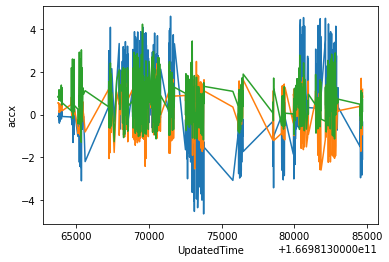

In [113]:
sb.lineplot(y = 'accx', x = 'UpdatedTime', data = plotjogdf)
sb.lineplot(y = 'accy', x = 'UpdatedTime', data = plotjogdf)
sb.lineplot(y = 'accz', x = 'UpdatedTime', data = plotjogdf)

<AxesSubplot:xlabel='UpdatedTime', ylabel='gyrx'>

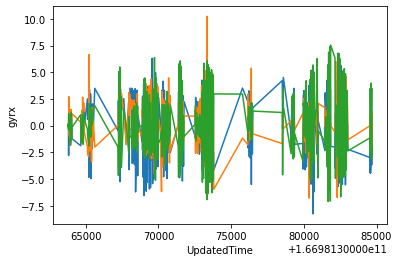

In [114]:
sb.lineplot(y = 'gyrx', x = 'UpdatedTime', data = plotjogdf)
sb.lineplot(y = 'gyry', x = 'UpdatedTime', data = plotjogdf)
sb.lineplot(y = 'gyrz', x = 'UpdatedTime', data = plotjogdf)

In [116]:
Label = []
for i in range(len(JOGDF)):
    Label.append("jogging")

In [117]:
JOGDF["Label"] = Label

In [118]:
JOGDF.to_csv("JOG.csv",index=False)